<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Model parameters are being determinaed for 2 levels of solar activity at F10.7=69.3 and 135.2 SFU
which correspands to 0 and 100 IG12 index.


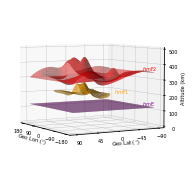

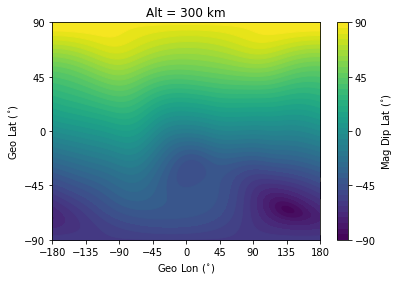

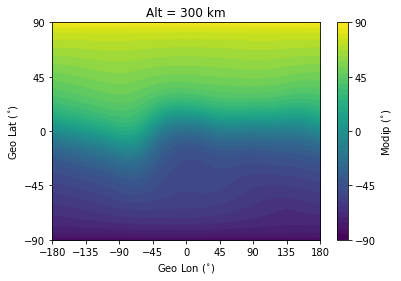

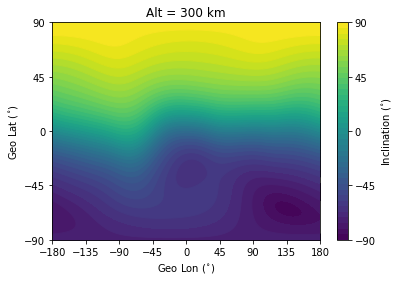

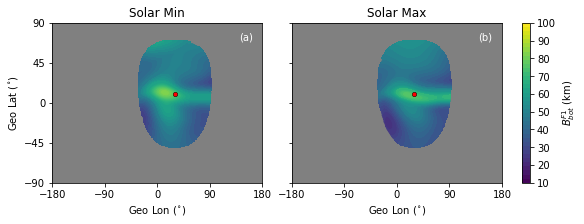

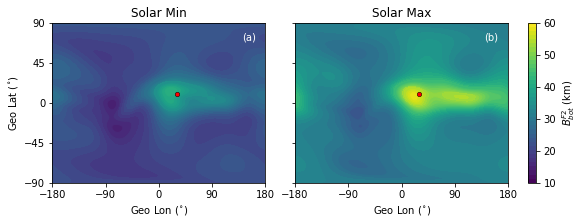

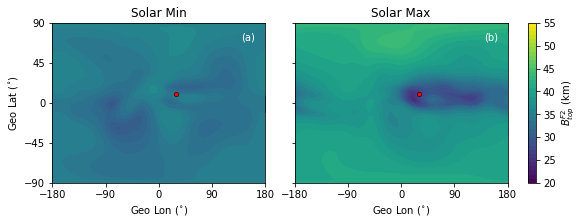

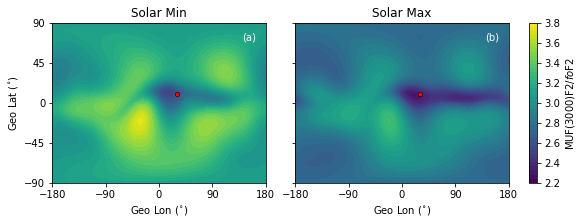

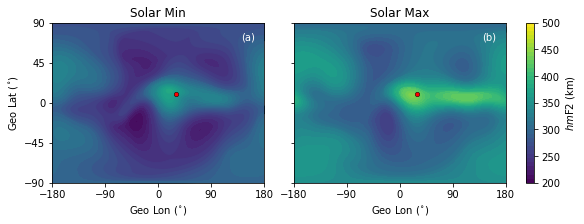

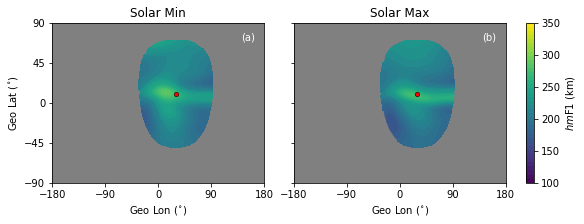

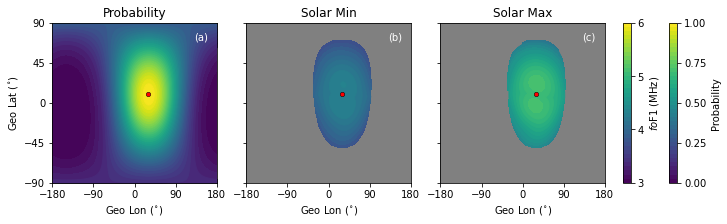

PyIRI: IRI_density_1day:----------------------------------------------
Determining parameters and electron density for 1 day: year=2020, month=4, day=15
For UT =  [ 0 10 20]
Longitude =  [-180 -180 -180 ...  180  180  180]
Latitude =  [-90 -89 -88 ...  88  89  90]
F10.7 value was taken from OMNIWeb data file: PyIRI/Solar_Drivers/Solar_Driver_F107.txt
F10.7=68.9
Model parameters are being determinaed for 2 levels of solar activity at F10.7=69.3 and 135.2 SFU
which correspands to 0 and 100 IG12 index.
Model parameters are being determinaed for 2 levels of solar activity at F10.7=69.3 and 135.2 SFU
which correspands to 0 and 100 IG12 index.
Mean monthly parameters are calculated
Completed
---------------------------------------------------------------------------
NmF2= 1144516282149.4902


()

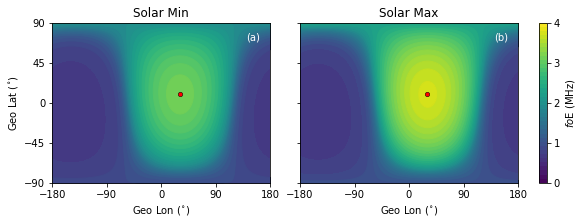

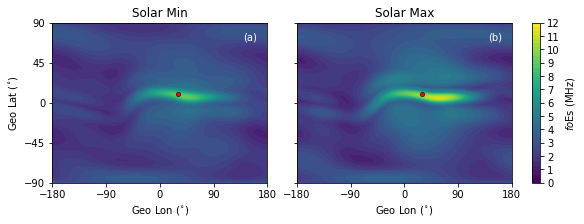

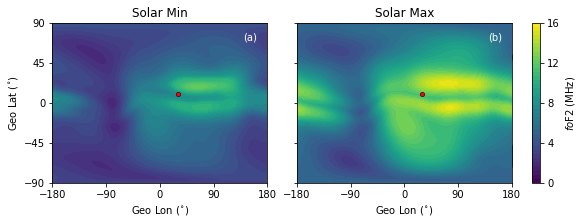

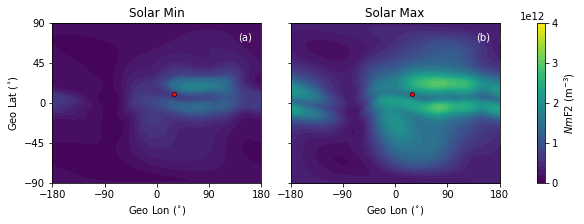

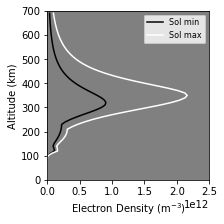

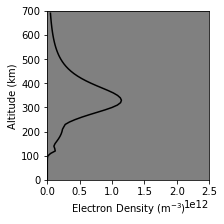

In [1]:
#############################################################################################
#      Distribution statement A. Approved for public release. Distribution is unlimited.    #
#      This work was supported by the Office of Naval Research                              #
#############################################################################################
import PyIRI_Library as ml
import PyIRI_IGRF_Library as IGRF
import PyIRI_Plotting_Library as plot
from datetime import datetime, timedelta
import numpy as np
#--------------------------------------------------------------------------------------------
dir='/Users/vmakarevich/Documents/Science_VF2/PyIRI/'
#--------------------------------------------------------------------------------------------
#Day of run:
#--------------------------------------------------------------------------------------------
year=2020
month=4
day=15
#--------------------------------------------------------------------------------------------
#Define parameters for grid and time resolution:
#--------------------------------------------------------------------------------------------
dlat=1       #resolution of geographic latitude {degrees} (integer or float)
dlon=1       #resolution of geographic longitude {degrees} (integer or float)

dalt=10      #resolution of altitude {km} (integer or float)
alt_min=0    #minimum altitude {km} (integer or float)
alt_max=700  #maximum altitude {km} (integer or float)

dUT=10        #time resolution {hours} (integer or float)

UT_plot=10    #at what UT to plot the parameters
#--------------------------------------------------------------------------------------------
#Define spacial horizontal grid:
#--------------------------------------------------------------------------------------------
#This function creates a regular global grid in Geographic coordinates using given spatial resolution dlon, dlat.
#In case you want to run IRI in magnetic coordinates, you can obtain a regular grid in magnetic coordinates,
#then convert it to geographic coordinates using your own methods, and then use these 1-D alon and alat arrays.
#Similarly, if you are interested in regional grid, then use your own alon and alat 1-D arrays
#alon and alat can also be irregular arrays.
#In case you need to run IRI for 1 grid point, define alon and alat as NumPy arrays that have only 1 element.
#Size of alon and alat is [N_G]

alon, alat, alon_2d, alat_2d = ml.set_geo_grid(dlon, dlat)
#--------------------------------------------------------------------------------------------
#Define time arrays:
#--------------------------------------------------------------------------------------------
#This function creates time array aUT using a given temporal resolution dUT in hours. 
#E.g. if dUT = 0.25 it will lead to 15-minutes time resolution. 
#You can define aUT your own way, just keep it 1-D and expressed in hours. 
#It can be regularly or irregularly spaced array. 
#If you want to run PyIRI for just 1 time frame, then define aUT as NumPy arrays that have only 1 element.
#Size of aUT is [N_T]

aUT, ahour, aminute, asecond, atime_frame_strings=ml.set_temporal_array(dUT)
#--------------------------------------------------------------------------------------------
#Monthly mean ionospheric parameters for min and max of solar activity:
#--------------------------------------------------------------------------------------------
#This is how PyIRI needs to be called to obtain montly mean values for all ionospheric parameters,
#for min and max conditions of solar activity:
#year and month should be integers, and aUT and alon, alat should be 1-D NumPy arrays. alon and alat should have the 
#same size. dir is the string direction where PyIRI folder lives. 
#Matrix size for all the output parameters is [N_T, N_G, 2], where 2 indicates min and max of the solar activity 
#that corresponds to Ionospheric Global (IG) index levels of 0 and 100.

F2, F1, E, Es, sun, mag=ml.IRI_monthly_mean_parameters(year, month, aUT, alon, alat, dir)  

#Plot all the parameters using PyIRI_Plotting_Library
plot.PyIRI_3D_hm_limits(F2, F1, E, aUT, alon, alat, alon_2d, alat_2d, UT_plot)
plot.PyIRI_plot_mag_dip_lat(mag, alon, alat, alon_2d, alat_2d)
plot.PyIRI_plot_modip(mag, alon, alat, alon_2d, alat_2d)
plot.PyIRI_plot_inc(mag, alon, alat, alon_2d, alat_2d)
plot.PyIRI_plot_B_F1_bot_min_max(F1, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_B_F2_bot_min_max(F2, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_B_F2_top_min_max(F2, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_M3000_min_max(F2, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_hmF2_min_max(F2, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_hmF1_min_max(F1, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_foF1_min_max(F1, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_foE_min_max(E, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_foEs_min_max(Es, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_foF2_min_max(F2, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
plot.PyIRI_plot_NmF2_min_max(F2, aUT, alon, alat, alon_2d, alat_2d, sun, UT_plot)
#--------------------------------------------------------------------------------------------
#Altitudinal array to build electron density:
#--------------------------------------------------------------------------------------------
# Create an array of altitudes for the veritical dimension of electron density profiles 
# Any 1-D Numpy array in [km] would work, regularly or irregularly spaced.

aalt=np.arange(alt_min, alt_max, dalt)
#--------------------------------------------------------------------------------------------
#Montly mean density for min and max of solar activity:
#--------------------------------------------------------------------------------------------
#Construct electron dnesity profiles for min and max levels of solar activity for monthly mean paramteres. 
#The result will have the following dimensions [2, N_T, N_V, N_G]

EDP=ml.reconstruct_density_from_parameters(F2, F1, E, aalt)

#Plot EDP at one location suing PyIRI_Plotting_Library
plot.PyIRI_EDP_sample(EDP, aUT, alon, alat, alon_2d, alat_2d, aalt, UT_plot)

#--------------------------------------------------------------------------------------------
#Montly mean density for min and max of solar activity:
#--------------------------------------------------------------------------------------------
#The original IRI model further interpolates between 2 levels of solar activity to estimate density for a particular 
#level of F10.7. Additionally, it interpolates between 2 consequent months to make a smooth seasonal transition. 
#Here is an example of how this interpolation can be done: 
#If you need to run IRI for a particular day, you can just use this function
F107_day=np.nan
F2_1day, F1_1day, E_1day, Es_1day, sun_1day, mag_1day, EDP_1day=ml.IRI_density_1day(year, month, day, aUT, 
                                                 alon, alat, aalt, F107_day, dir)

#plot 1 profile
plot.PyIRI_EDP_sample_1day(EDP_1day, aUT, alon, alat, alon_2d, alat_2d, aalt, UT_plot)
#--------------------------------------------------------------------------------------------

